In [1]:
# import libraries

import time
from phySyncFirmata import ArduinoNano, util

In [2]:
# declare board and adjust port

board = ArduinoNano('/dev/ttyUSB0')

In [3]:
# reset all inputs, outputs (except for buzzer on pin 5)

for i in set(range(4, 14)) - {5}:
    board.digital[i].write(1)

In [4]:
# declare thermistor

thermistor = board.get_pin('a:6:i')

In [5]:
# enable reporting

thermistor.enable_reporting()

# start iterator

it = util.Iterator(board)
it.start()

In [6]:
# turn on matploltib notebook setting - very important in jupyter notebooks!

%matplotlib notebook 

# import required libraries

from phySyncFirmata.phyCom import common_Utility_2 as plotter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import log

In [7]:
# read data from thermistor and calculate temperature using Steinhart - Hart equation
A = 0.001125308852122
B = 0.000234711863267
C = 0.000000085663516
def thermistorReader():
    resistance = 10000 / (1 / thermistor.read() - 1)
    temp = 1 / (A + B * log(resistance) + C * (log(resistance) ** 3)) - 273.15
    return temp

<IPython.core.display.Javascript object>


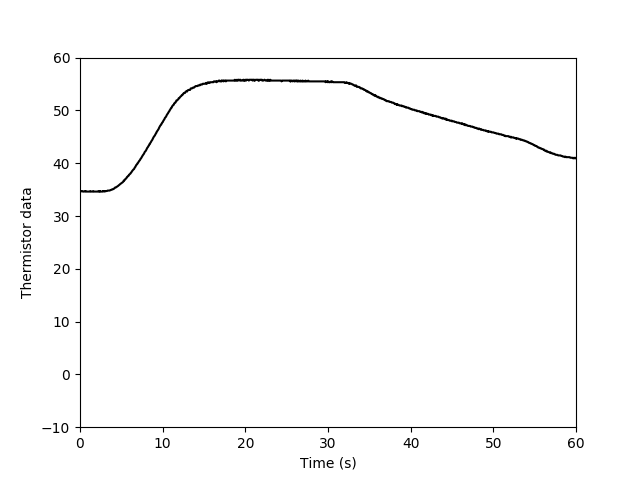

In [8]:
# create plot figure and axes
fig, ax = plt.subplots()

# declare plotter class instance with following arguments:
# fig -> figure to plot on
# ax -> axes to use
# func -> the function requiring no arguments which will be plotted -- e.g. ldr.read, numpy.random.randn etc 
# style -> plotting styles supported by matplotlib
# timeSeconds -> plotting time in seconds

# code for plotting LDR data vs time for 5 seconds

p = plotter.Plotter(fig, ax, thermistorReader, style = 'k-', timeSeconds = 60)

# required for starting animation

ani = animation.FuncAnimation(fig, p.update, p.gen, blit = True, interval = 50, repeat = False)

plt.xlabel('Time (s)')
plt.ylabel('Thermistor data')

plt.ylim(-10, 60)

plt.show()

In [9]:
# clean up

thermistor.disable_reporting()

In [11]:
# exit

board.exit()